#### Train Models without Feature selection Skin Disorder 

# Import Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [3]:
file_path = r'S:\Projects\Capstone Projects\#3 Skin Disorder\dataset_35_dermatology (1).csv'

data = pd.read_csv(file_path)

In [3]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


# Convert 'Age' column object to numeric 

In [4]:

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [24]:

# Fill missing values in the "Age" column with the mean
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)


# Check if there are still any missing values in the dataset
print(data.isnull().sum())

# Print the first few rows of the cleaned DataFrame
print(data.head())


erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

# defing Independent variables as x and Dependent variable(Target variable ) as y

In [25]:
x = data.iloc[:,:34]
x

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,25.0
362,3,2,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,2,0,36.0
363,3,2,2,2,3,2,0,2,0,0,...,3,0,3,0,3,0,0,2,3,28.0
364,2,1,3,1,2,3,0,2,0,0,...,3,0,2,0,1,0,0,2,3,50.0


In [27]:
y = data['class']
y

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: class, Length: 366, dtype: int64

# Imbalanced Class Detection

In [28]:

class_distribution = y.value_counts(normalize=True)
print(class_distribution)


class
1    0.306011
3    0.196721
2    0.166667
5    0.142077
4    0.133880
6    0.054645
Name: proportion, dtype: float64


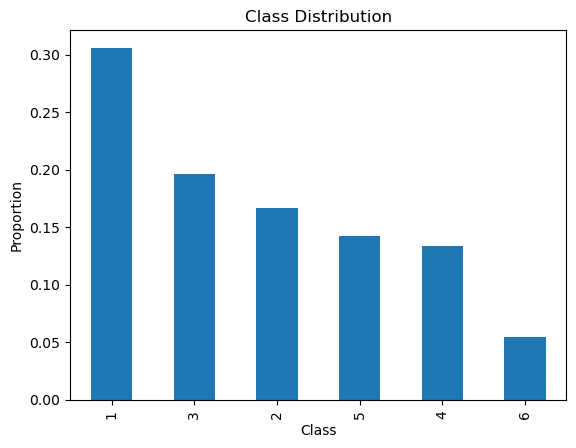

In [29]:
# Visualize Class Distribution:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

### imbalance data analysis
- The imbalance in the target variable "class" is evident, as Class 1 dominates the dataset with a high percentage.
- Class 6 minority classes, which could pose challenges during model training, especially for algorithms sensitive to class imbalance.

# Handling Imbalanced data

In [30]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(x, y)

# Convert the oversampled data back to a DataFrame if needed
X_smote = pd.DataFrame(X_smote, columns=x.columns)  

# Now X_smote and y_smote contain the oversampled data


In [31]:
X_smote

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,0,55.0
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,8.0
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,26.0
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,40.0
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,3,2,0,1,0,0,2,0,1,0,...,0,0,0,3,0,1,2,2,0,12.0
668,2,2,1,0,0,0,3,0,2,0,...,0,0,0,2,0,3,3,2,0,7.0
669,2,2,2,0,0,0,1,0,1,0,...,0,0,0,1,0,3,2,2,0,9.0
670,2,2,2,1,0,0,2,0,2,2,...,0,0,0,2,0,2,2,2,0,7.0


In [32]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  672 non-null    int64  
 1   scaling                                   672 non-null    int64  
 2   definite_borders                          672 non-null    int64  
 3   itching                                   672 non-null    int64  
 4   koebner_phenomenon                        672 non-null    int64  
 5   polygonal_papules                         672 non-null    int64  
 6   follicular_papules                        672 non-null    int64  
 7   oral_mucosal_involvement                  672 non-null    int64  
 8   knee_and_elbow_involvement                672 non-null    int64  
 9   scalp_involvement                         672 non-null    int64  
 10  family_history                        

In [33]:

class_distribution = y_smote.value_counts(normalize=True)
print(class_distribution)

class
2    0.166667
1    0.166667
3    0.166667
5    0.166667
4    0.166667
6    0.166667
Name: proportion, dtype: float64


In [34]:
y_smote= pd.DataFrame(y_smote)
y_smote.columns =["class"]

In [35]:
y_smote.value_counts()

class
1        112
2        112
3        112
4        112
5        112
6        112
Name: count, dtype: int64

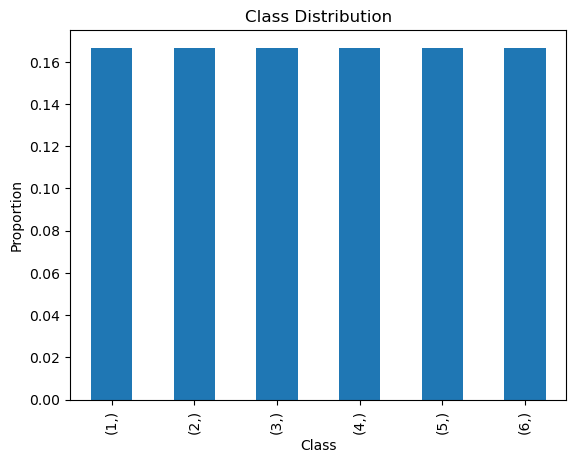

In [36]:
#Visualize Class Distribution: after balancing the data
class_distribution_balanced = y_smote.value_counts(normalize=True)
class_distribution_balanced.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Distribution')
plt.show()

# Splitting the dataset into the Training set and Test set

In [38]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=4)

In [39]:
x_train

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age
585,3,2,2,0,0,0,3,0,1,0,...,0,0,0,2,0,3,2,2,0,10.0
238,2,2,2,2,0,0,0,0,0,1,...,0,2,0,0,0,0,0,1,0,60.0
179,2,2,2,2,0,2,0,3,0,0,...,3,0,3,3,3,0,0,2,2,36.0
328,2,1,0,1,0,0,0,0,0,0,...,0,1,0,3,0,0,0,2,0,18.0
482,2,1,2,2,1,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,2,2,0,1,0,0,2,0,2,0,...,0,0,0,1,0,2,2,2,0,22.0
360,2,2,1,1,0,0,0,0,0,0,...,0,0,0,3,0,0,0,1,0,25.0
439,2,2,2,3,1,2,0,2,0,0,...,2,2,2,1,3,0,0,2,3,28.0
174,3,2,2,2,0,2,0,2,0,0,...,2,0,2,3,2,0,0,2,3,40.0


In [40]:
y_train

,class
585,6
238,1
179,3
328,4
482,4
...,...
599,6
360,2
439,3
174,3


# Logistic Regression Model Creation

In [21]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() 
clf.fit(x_train,y_train) 

LogisticRegression()

In [22]:
y_pred=clf.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 2, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [23]:
y_test

,class
507,4
320,1
615,6
379,2
70,2
...,...
68,5
405,2
376,2
340,1


In [24]:
# Calculate accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9925925925925926


In [25]:
y_pred_train = clf.predict(x_train)
y_pred_test =clf.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9981378026070763
Testing Accuracy: 0.9925925925925926


In [26]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  0 21  0  0  0]
 [ 0  1  0 25  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


# The logistic model demonstrates high accuracy in both training (99.81%) and testing (99.26%) phases, indicating strong predictive performance and generalization capability.







# DecisionTreeClassifier Model Creation

In [ ]:
#For classification tasks
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=DTC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [ ]:
y_test

,class
507,4
320,1
615,6
379,2
70,2
...,...
68,5
405,2
376,2
340,1


In [ ]:
# Calculate accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
y_pred_train = DTC.predict(x_train)
y_pred_test =DTC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


# The decision tree model achieves optimal accuracy in both training (100%) and testing (100%) phases, showcasing its capacity to learn and generalize patterns effectively from the dataset.








# RandomForestClassifier model creation.

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest Classifier
RFC = RandomForestClassifier(random_state=42)

# Train the model
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test data
y_pred = RFC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [29]:
y_test

,class
507,4
320,1
615,6
379,2
70,2
...,...
68,5
405,2
376,2
340,1


In [30]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [31]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        18

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [32]:
# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[26  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


In [33]:
y_pred_train = RFC.predict(x_train)
y_pred_test = RFC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


# The random forest classifier achieves perfect accuracy in both training (100%) and testing (100%) phases, highlighting its robustness and ability to generalize well to unseen data.


# GradientBoostingClassifier model creation.

In [ ]:
#For classification tasks
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
# Make predictions on the test data
y_pred = GBC.predict(x_test)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [ ]:
y_test

,class
507,4
320,1
615,6
379,2
70,2
...,...
68,5
405,2
376,2
340,1


In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        18

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



In [ ]:
# Print confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[26  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  0 21  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 18]]


In [ ]:
y_pred_train = GBC.predict(x_train)
y_pred_test = GBC.predict(x_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


# The gradient boosting model demonstrates exceptional accuracy in both training (100%) and testing (100%) phases, indicating its ability to learn complex patterns and generalize effectively to new, unseen data.

# Scaling

In [41]:
#Scaling : Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create Support Vector Classifier (SVC)

In [41]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) 
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [42]:
y_pred = svc_model.predict(X_test_scaled)
y_pred

array([4, 1, 6, 2, 2, 1, 1, 1, 5, 3, 4, 5, 2, 3, 4, 6, 3, 6, 5, 4, 6, 1,
       2, 1, 1, 1, 4, 4, 1, 1, 3, 6, 3, 2, 4, 4, 1, 3, 1, 1, 4, 4, 5, 3,
       6, 4, 2, 1, 4, 5, 2, 6, 2, 3, 6, 5, 5, 3, 3, 3, 3, 2, 1, 3, 5, 3,
       3, 2, 4, 4, 4, 1, 6, 3, 1, 5, 3, 4, 6, 5, 6, 1, 1, 2, 6, 2, 3, 4,
       1, 1, 5, 5, 2, 3, 3, 6, 1, 2, 6, 4, 4, 2, 3, 6, 6, 4, 2, 1, 1, 5,
       2, 4, 5, 4, 5, 2, 4, 5, 2, 4, 6, 2, 6, 2, 5, 4, 5, 2, 5, 4, 5, 2,
       2, 1, 1], dtype=int64)

In [43]:
y_test

,class
507,4
320,1
615,6
379,2
70,2
...,...
68,5
405,2
376,2
340,1


In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [45]:
y_pred_train = svc_model.predict(X_train_scaled)
y_pred_test = svc_model.predict(X_test_scaled)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.994413407821229
Testing Accuracy: 1.0


# The Support Vector Classifier (SVC) achieves high training accuracy (99.44%) and perfect testing accuracy (100%), highlighting its capability to generalize well to new data while maintaining high performance on the training set.

# Create MLPClassifier model

In [42]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,  # Regularization parameter
    random_state=42,
    max_iter=200,  # Increase max_iter for convergence
    early_stopping=True,  # Stop training when validation score doesn't improve
    verbose=True  # Print progress during training
)


In [43]:
# Train the model
model.fit(X_train_scaled, y_train)

Iteration 1, loss = 1.84345397
Validation score: 0.296296
Iteration 2, loss = 1.64028690
Validation score: 0.555556
Iteration 3, loss = 1.46915329
Validation score: 0.555556
Iteration 4, loss = 1.31982649
Validation score: 0.592593
Iteration 5, loss = 1.16965276
Validation score: 0.611111
Iteration 6, loss = 1.01650119
Validation score: 0.629630
Iteration 7, loss = 0.86439737
Validation score: 0.722222
Iteration 8, loss = 0.72202985
Validation score: 0.814815
Iteration 9, loss = 0.59722166
Validation score: 0.870370
Iteration 10, loss = 0.48028890
Validation score: 0.925926
Iteration 11, loss = 0.37922413
Validation score: 0.925926
Iteration 12, loss = 0.29012205
Validation score: 0.888889
Iteration 13, loss = 0.22112313
Validation score: 0.907407
Iteration 14, loss = 0.16905352
Validation score: 0.907407
Iteration 15, loss = 0.12971975
Validation score: 0.907407
Iteration 16, loss = 0.10248669
Validation score: 0.925926
Iteration 17, loss = 0.08209149
Validation score: 0.981481
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
              random_state=42, verbose=True)

In [44]:
# Predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [45]:
# Evaluate the model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9888
Test Accuracy: 0.9926


# The Multi-Layer Perceptron (MLP) Neural Network achieves a training accuracy of 98.88% and a testing accuracy of 99.26%, indicating its capability to learn complex patterns in the training data and generalize effectively to new, unseen data with good predictive performance.